<a href="https://colab.research.google.com/github/leejyy/Assignment/blob/master/decisionTree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

get the data


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/tree/kyphosis.csv')

In [6]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


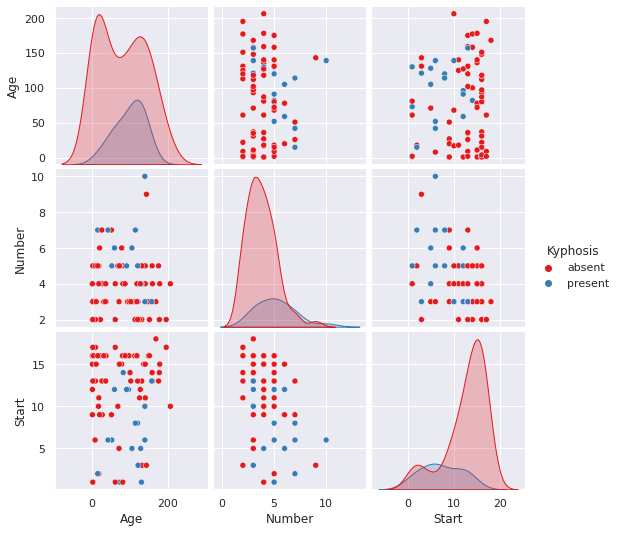

In [7]:
sns.pairplot(df, hue = 'Kyphosis', palette = 'Set1')

Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction and Evaluation

In [15]:
predictions=dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [20]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 2  2]]


Tree Visualization

In [23]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

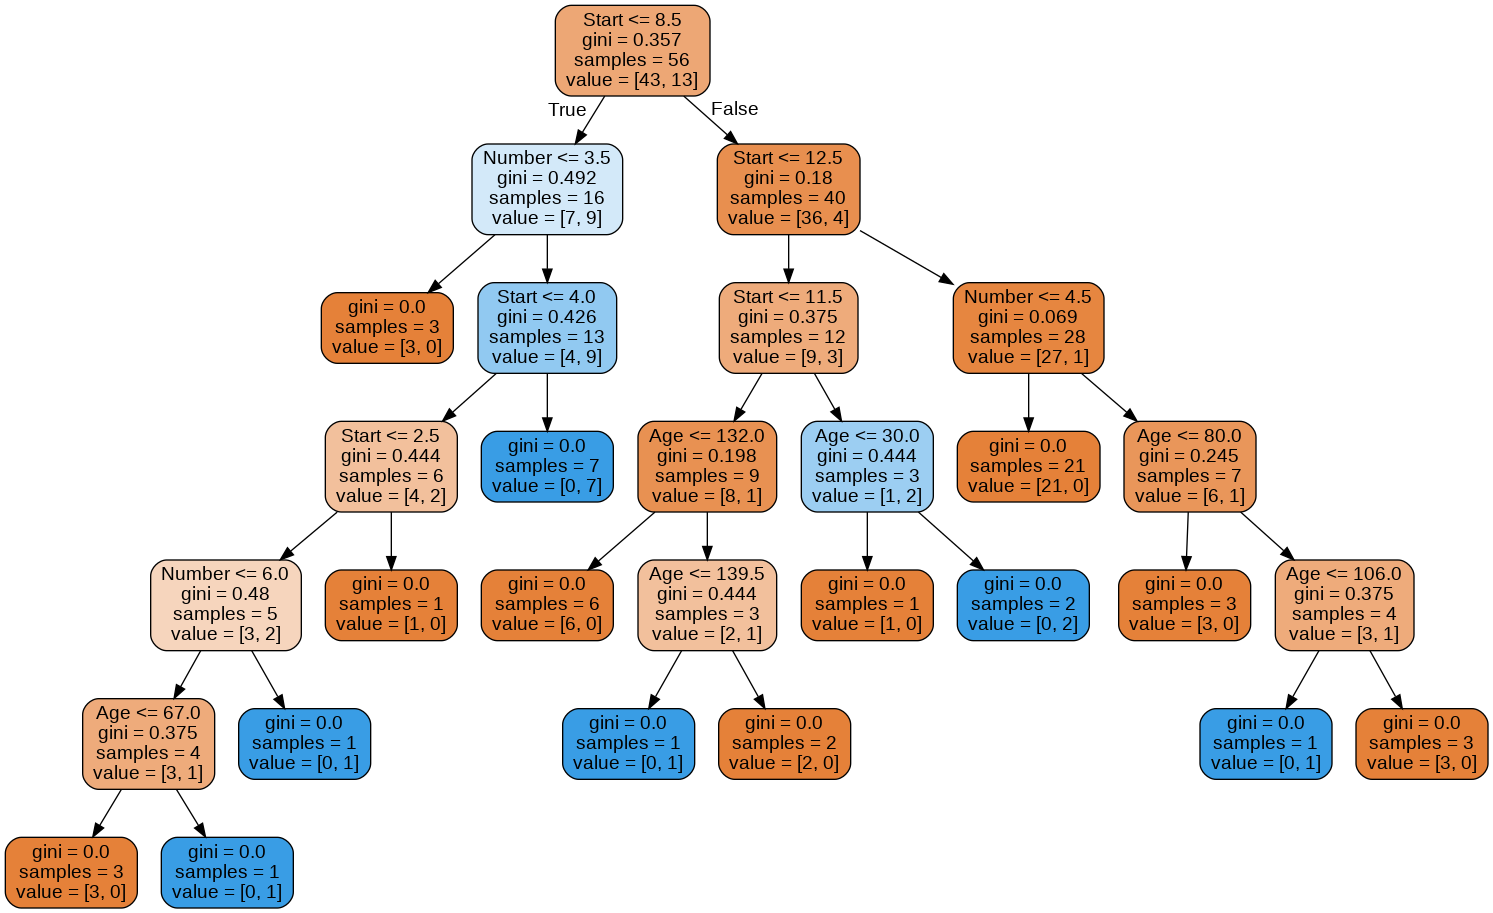

In [24]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rfc_pred))

[[20  1]
 [ 2  2]]


In [30]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25

